# (Kaggle) Titanic: Machine Learning from Disaster Chap1

## 시작하기 전에

* 타이타닉 해상사고 데이터 분석을 진행하기 앞서 사용했던 파이썬 패키지 정리
    1. pip install numpy
    2. pip install scipy
    3. pip install pandas
    4. pip install scikit-learn
    5. pip install matplotlib
    6. pip install seaborn
    7. pip install jupyter

## 데이터 설명 및 로드(Data Description & Loading)

* 해당 링크 참조 [Kaggle Titanic Data Description](https://www.kaggle.com/c/titanic)

In [1]:
# pandas 패키지를 사용
import pandas as pd

# 블로그 업데이트용 jupyter notebook 크기 수정하는 부분(선택사항)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 97% !important; }</style>"))

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Titanic raw data 불러오기
# PassengerId를 index로 설정(데이터 탐색에 용이)
train = pd.read_csv("data/train.csv", index_col="PassengerId")

# train 데이터의 크기를 확인하는 부분
print(train.shape)

# head()를 사용 상위 5개의 행의 데이터를 확인할 수 있음
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# test.csv 데이터도 같은 방식으로 불러온다
test = pd.read_csv("data/test.csv", index_col="PassengerId")

print(test.shape)
test.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 탐험적 데이터 분석(Exploratory Data Analysis)

데이터를 머신러닝에 적용하여 생존자 예측을 하기 전 가지고 있는 데이터를 가공하고 분석하는 작업을 진행해봅니다. 기존 엑셀에서도 피벗 테이블이나 차트 등을 이용하여 시각적, 직관적, 배경지식 등을 동원하여 가설을 세우고 의미있는 feature들을 골라내는 작업을 했었습니다. 같은 방식으로 파이썬에 있는 ```pandas```패키지를 이용하여 진행할 수 있으며 대용량의 데이터까지도 분석이 가능한 점에서 매우 유용할 수 있습니다.

이번 챕터에선 ```matplotlib(파이썬 2D 플로팅 패키지)```과 ```seaborn(matplotlib기반 파이썬 데이터 시각화 패키지)```등을 사용해 봅니다.

* 참고링크([matplotlib](https://matplotlib.org/), [seaborn](https://seaborn.pydata.org/))

In [4]:
# 각각의 패키지를 불러옵니다
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib의 결과물을 jupyter notebook에 띄우기 위해선 아래와 같은 라인을 추가해 주어야 합니다.
%matplotlib inline

### Sex(성별) 컬럼 분석

먼저 ```Sex(성별)```데이터에 따른 생존 여부를 countplot을 이용해 살펴봅니다 

분석을 진행하기 앞서 가설을 세우거나 예측을 하기 쉬운(성별은 남과 여 2종류 밖에 없고(categorical data) 통념상 여성보단 남성이 더 많이 죽었을 것(구조등의 활동은 남성이 많이 했을 것))데이터라고 쉽게 예측되는 부분이 있기 때문입니다.

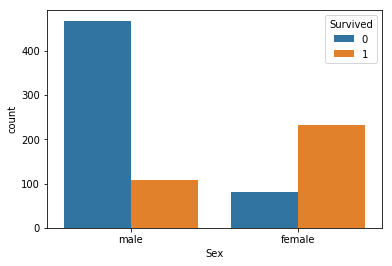

In [5]:
# countplot : 각 category별 관측 수를 barplot 기반으로 보여줌
# 참조링크 : (https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot)
sns.countplot(data=train, x="Sex", hue="Survived")

In [6]:
# pandas에 있는 pivot_data를 이용하여 성별에 따른 생존확률을 나타내어 본다
# 참조링크 : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html
pd.pivot_table(train, index="Sex", values="Survived")

,Survived
Sex,
female,0.742038
male,0.188908


해당 결과를 해석해보면 다음와 같습니다. 생존자 보단 사망자가 다수이고 타이타닉 탑승객들 중 여성의 생존률이 **_74.2%_**이고 남성의 생존률은 **_18.9%_** 정도로 나오는 것으로 보아 상대적으로 적은 생존자들 중에 여성의 생존률이 그나마 높은 것으로 확인해 볼 수 있습니다.

한 문장으로 정리하면, "여성일 수록 살아남았을 확률이 높다."라고 정리할 수 있겠습니다.

```pivot table```과 ```countplot```등과 같은 차트는 각각의 장단이 있습니다.

* 그래프 등을 통한 분석은 구체적 수치를 한 번에 파악하기 힘들지만 변화의 추이와 양상을 파악하기 쉽습니다.
* pivot table 통해 분석을 하면 구체적인 수치값을 알기 쉽지만 그 수치가 어느정도의 양상을 띄고 있는지 한 번에 파악하기 어렵습니다.

따라서 양쪽의 방법(테이블과 차트)를 동시에 이용하는 편이 좋습니다.

### Pclass(승선 티켓 등급) 컬럼 분석

그 다음으로 분석이 용이해 보이는 컬럼이 ```Pclass```컬럼인데 역시 종류가 1, 2, 3 등급 3가지 밖에 없어(categorical data) 그리고 쉽게 가설을 세워 유의미한 상관관계를 가지고 있을거라 생각했기 때문입니다.

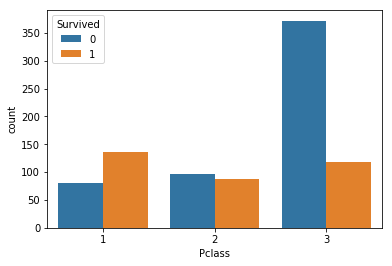

In [7]:
# countplot을 통한 양상 확인
sns.countplot(data=train, x="Pclass", hue="Survived")

In [8]:
# pivot table을 통한 Pclass에 따른 생존률 확인
pd.pivot_table(train, index="Pclass", values="Survived")

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


분석 결과 1등급의 승객들의 생존률이 상대적으로 높으며, 3등급의 승객은 사망률이 압도적으로 높습니다.

1등급의 승객만 생존률이 **과반 이상**이며, 2, 3등급은 생존률이 **절반 이하**입니다.
따라서 "1등급 승객일 수록 생존확률이 높다."고 정리할 수 있겠습니다.

### Embarked(탑승 선착장) 컬럼 분석

탑승 선착장 또한 categorical data이기 때문에 상관관계를 쉽게 따질 수 있을 것 같아 분석을 진행해 봅니다.

* 세르부르(Cherbourg, C)
* 퀸스타운(Queenstown, Q)
* 사우스햄튼(Southampton, S) 

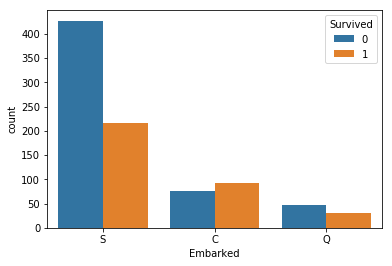

In [9]:
# countplot을 이용한 양상 확인
sns.countplot(data=train, x="Embarked", hue="Survived")

In [10]:
# pivot table을 이용한 생존률 확인
pd.pivot_table(train, index="Embarked", values="Survived")

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


Q와 S선착장에서 탑승한 승객들은 생존률이 낮고 그나마 과반 이상의 생존률(**55%**)을 보이는 곳이 C 선착장으로 보입니다.
시각적으로 눈에 띄는 점은 S선착장의 승객의 사망률이 생존률보다 2배가량 높다는 점입니다. 따라서 생존여부의 판단을 내릴 때 "C선착장 승객이면 그나마 생존률이 높다."고 정리할 수 있겠습니다.

왜 유독 C선착장 승객들의 생존률이 과반을 넘어섰는지 의문을 가져 pivot table을 이용하여 ```Embarked```와 ```Sex```에 따른 ```Pclass```와 ```Survived```데이터의 상관관계를 확인해보겠습니다.

In [11]:
pd.pivot_table(train, index=["Embarked", "Sex"], columns="Pclass", aggfunc="count", values="Survived")

Pclass            1   2    3
Embarked Sex                
C        female  43   7   23
         male    42  10   43
Q        female   1   2   33
         male     1   1   39
S        female  48  67   88
         male    79  97  265

앞서 데이터를 분석한 사실을 바탕으로(여성, 1등급 승객들의 생존률이 높다) 예상해 봤을 때 C선착장 승객들 중에 1등급이면서 여성인 승객이 많을 것이라고 예상을 해보았는데, pivot table의 결과 역시 C선착장에서 1등급이면서 여성인 승객도 많았지만 1등급의 승객 또한 많았습니다. 

S선착장 또한 1등급이면서 여성인 승객 '수 자체'는 높지만 비율적으로 3등급의 승객이 압도적으로 많았기에(특히 3등급이면서 남자인 승객들) 생존률이 많이 하락이 되었다고 볼 수 있습니다.

따라서 C선착장의 생존률이 상대적으로 높았던 이유는 "1등급의 여성 승객의 비율이 높았던 것이 영향을 주었다." 라고 해석해 볼 수 있습니다.

### Age(연령) 컬럼 분석

이제는 상대적으로 이전 데이터들 보다 categorical하지 않은 데이터를 가지고 분석을 해 보겠습니다. 

먼저 ```Age(연령)```에 따른 ```Survived```에 대해 알아 볼 것인데 ```Age```데이터는 매우 다양해서 그 경향을 countplot이나 pivot table로는 확인하기 어렵습니다

<Figure size 1080x576 with 0 Axes>

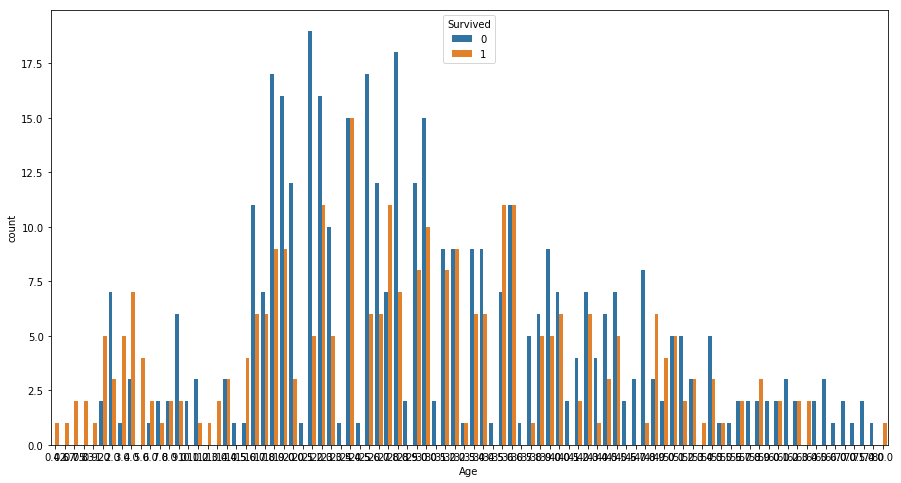

In [12]:
plt.figure(figsize=(15, 8))
sns.countplot(data=train, x="Age", hue="Survived")

In [13]:
# pivot table 또한 category가 너무 많이 그 비율의 유의미함을 파악하기 어렵습니다
print(pd.pivot_table(train, index="Age", values="Survived").shape)
# head()를 이용하여 일부만 출력(총 88행의 데이터)
# 연령이 정수가 아닌 실수로 처리 되어 있어 나이에 따른 생존여부의 경향성을 파악하기 까다롭습니다.
pd.pivot_table(train, index="Age", values="Survived").head(10)

(88, 1)


,Survived
Age,
0.42,1.000000
0.67,1.000000
0.75,1.000000
0.83,1.000000
0.92,1.000000
1.00,0.714286
2.00,0.300000
3.00,0.833333
4.00,0.700000


<Figure size 720x576 with 0 Axes>

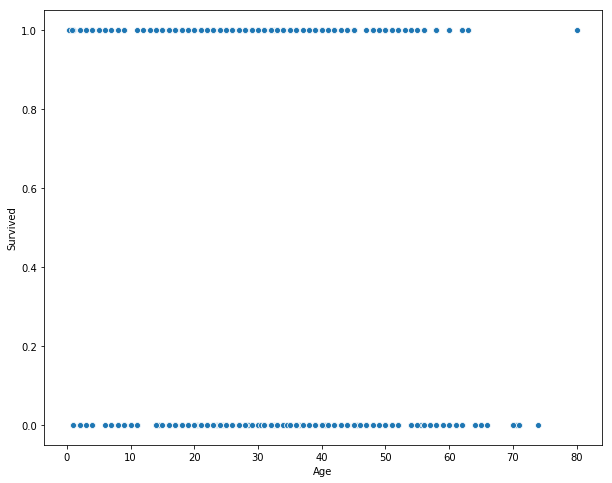

In [14]:
# countplot으로 시각적인 경향성을 파악하기 어려워 다른 그래프를 통해 확인해 보겠습니다
# scatterplot : 점으로 표현된 그래프, 주로 상관관계를 시각적으로 확인할 때 많이 쓰임
plt.figure(figsize=(10, 8))
sns.scatterplot(data=train, x="Age", y="Survived")

```Age```단독 데이터를 사용하여 ```Survived```와의 경향성을 확인한 결과, 뚜렷하게 의미를 얻어내기 어렵게 나왔습니다. Age데이터 또한 정수가 아닌 실수형 데이터도 많아서 있는 그대로 사용하기 어려워 보입니다.

상식선에서 생각을 해봤을 때, 어린 아이들이나 독신(자기 몸만 챙겨도 되는 사람들)들이 생존이 높을 것이라고 예상은 되지만 Age의 데이터만 가지고는 그 양상을 파악하기 어려웠습니다. 여기서 해볼 수 있는 것은 다음과 같습니다

1. ```Age```데이터를 범주를 나눠서 묶습니다 (10대, 20대, 30대, ... )
2. ```Age```데이터와 다른 데이터를 합쳐서 ```Survived```와의 양상을 확인해 봅니다.

In [15]:
# Age의 결측치가 채워 졌을때와 그렇지 않을 때의 차이점을 알기 위해 결측치를 채운 버전으로 새로 작성
train["Age_fill"] = train["Age"]
train["Age_fill2"] = train["Age"]
# train.loc[train["Age_fill"].isnull(), "Age_fill"] = train["Age_fill"].mean()
train.loc[train["Age_fill"].isnull(), "Age_fill"] = 0 # 결측치를 0으로 채우기
train.loc[train["Age_fill2"].isnull(), "Age_fill2"] = train["Age_fill"].mean() # 결측치를 Age의 평균값 으로 채우기

<Figure size 720x576 with 0 Axes>

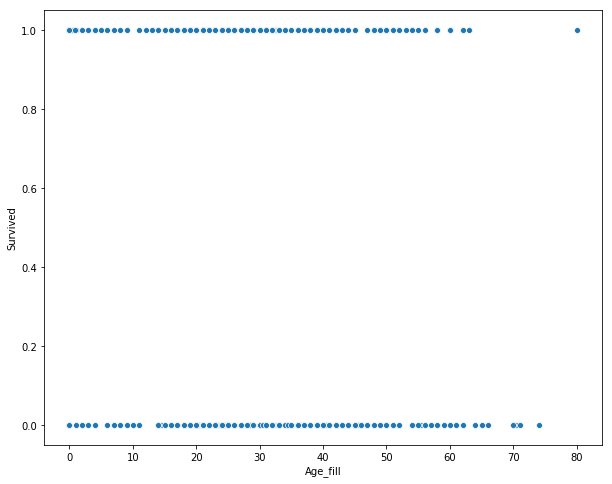

In [16]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=train, x="Age_fill", y="Survived")

### Age(연령)와 Fare(요금) 컬럼 동시 분석

```Age(연령)```과 비슷한 데이터로 ```Fare(요금)```이 있는데, 요금을 많이 지불한 승객일 수록 높은 등급의 티켓을 살 가능성이 높고, 돈은 주로 어느정도 **연령이 있는 사람**일 수 록 많이 가지고 있을 가능성이 높습니다. 

이런 가정을 두고 각 데이터들과 생존률간의 관계를 분석해 보겠습니다.

<Figure size 720x360 with 0 Axes>

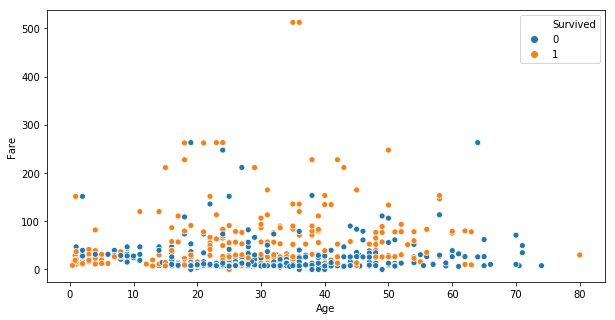

In [17]:
# 시각화 그래프는 scatterplot을 활용해 보도록 합니다 (2변수, 1변수 간의 상관관계를 확인해는데 용이)
plt.figure(figsize=(10, 5))
sns.scatterplot(data=train, x="Age", y="Fare", hue="Survived")

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

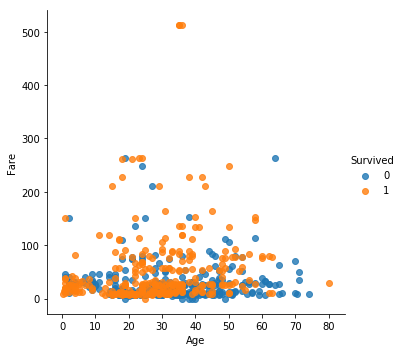

In [18]:
# 비슷한 그래프로는 lmplot이 있습니다
# 앞선 scatterplot보다 더 확실히 분포도와 경향을 한눈에 확인하기 좋습니다
# fig_reg 인수는 회귀선 유무를 설정할 수 있습니다.
plt.figure(figsize=(10, 5))
sns.lmplot(data=train, x="Age", y="Fare", hue="Survived", fit_reg=False)

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

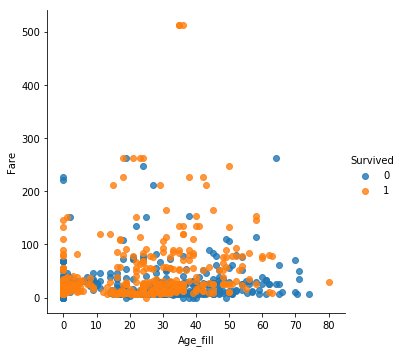

In [19]:
# 결측치를 0으로 채운 버전입니다.
plt.figure(figsize=(10, 5))
sns.lmplot(data=train, x="Age_fill", y="Fare", hue="Survived", fit_reg=False)

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

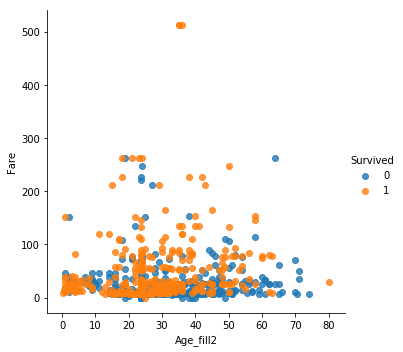

In [20]:
# 결측치를 평균값 으로 채운 버전입니다.
plt.figure(figsize=(10, 5))
sns.lmplot(data=train, x="Age_fill2", y="Fare", hue="Survived", fit_reg=False)

위 그래프들을 통해서 알 수 있는 사실은 다음과 같습니다.

* 유난히 분포도와 멀리 떨어진 데이터들이 보인다(요금 500이상을 낸 사람들, 아웃라이어)
* ```Fare```값의 범위가 넓게 잡혀있어 정확한 상관관계를 예측하기 어렵다

아웃라이어 값들은 몇 개만 존재하더라도 정확한 범주내에서 경향성을 파악하기 어려워 질 수 있기 때문에 값을 수정하던가, 제거하는 식으로 전처리를 하게 됩니다.
임시적으로 해당 이상치(outlier)들을 제거하고 다시 경향을 확인해 봅니다.

In [21]:
# 실제 이상치의 데이터가 몇개 있는지 확인해 봅니다(총 3명이 확인, 모두 생존)
print(train[train["Fare"] >= 500].shape)
train[train["Fare"] >= 500]

(3, 13)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_fill,Age_fill2
PassengerId,,,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,35.0,35.0
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,36.0,36.0
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,35.0,35.0


<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

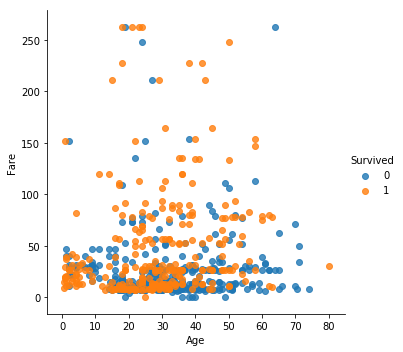

In [22]:
# 이상치 데이터들을 제외하고 정제된 데이터를 가지고 다시 시각화를 진행해 봅니다.
modify_train = train[train["Fare"] < 500]
plt.figure(figsize=(10, 5))
sns.lmplot(data=modify_train, x="Age", y="Fare", hue="Survived", fit_reg=False)

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

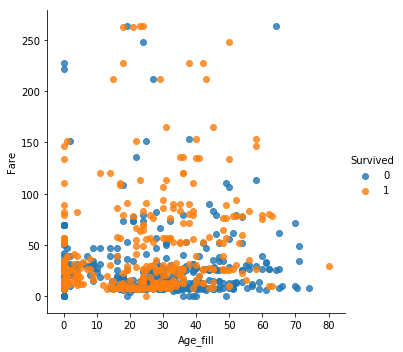

In [23]:
# 이상치 데이터들을 제외하고 정제된 데이터를 가지고 다시 시각화를 진행해 봅니다.(Age결측치가 0으로 채워진 버전)
modify_train = train[train["Fare"] < 500]
plt.figure(figsize=(10, 5))
sns.lmplot(data=modify_train, x="Age_fill", y="Fare", hue="Survived", fit_reg=False)

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

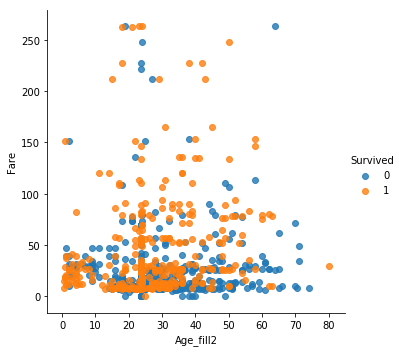

In [24]:
# 이상치 데이터들을 제외하고 정제된 데이터를 가지고 다시 시각화를 진행해 봅니다.(Age결측치가 평균으로 채워진 버전)
modify_train = train[train["Fare"] < 500]
plt.figure(figsize=(10, 5))
sns.lmplot(data=modify_train, x="Age_fill2", y="Fare", hue="Survived", fit_reg=False)

이전의 결과보다 더 확실하게 확인할 수 있는데 위 그래프를 보고 다음과 같은 사실들을 알 수 있습니다.

* 요금을 많이 낼 수 록 생존확률이 높다
* 어린 아이들(특히 0~10세)일 수록 생존할 확률이 높다
* 현 시점에서도 몰려있는 부분에 대한 정확한 경향성을 얻기가 어렵습니다(다소 퍼져있는 즉 요금대가 비싼 승객들로 인해 경향이 모호하게 보임)

```Fare```의 범위를 좀 더 다수에 향하도록 낮춰서 경향을 분석해 보겠습니다.

In [25]:
# 요금을 100 이하까지 낮추어 좀 더 많은 사람들의 경향을 확인할 수 있게끔 범위를 조정합니다.
low_modify_train = train[train["Fare"] <= 100]

# 각각의 데이터들의 크기를 중간확인합니다.(요금 100 이하가 대다수임을 확인)
train.shape, modify_train.shape, low_modify_train.shape

((891, 13), (888, 13), (838, 13))

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

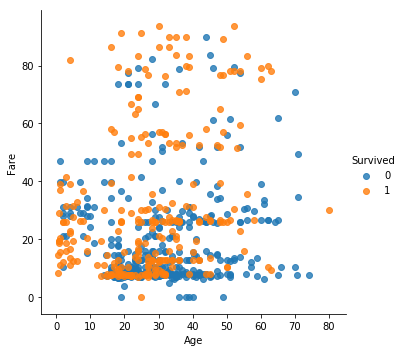

In [26]:
plt.figure(figsize=(10, 5))
sns.lmplot(data=low_modify_train, x="Age", y="Fare", hue="Survived", fit_reg=False)

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

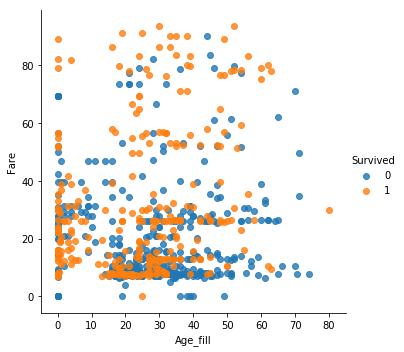

In [27]:
# (Age결측치가 0으로 채워진 버전)
plt.figure(figsize=(10, 5))
sns.lmplot(data=low_modify_train, x="Age_fill", y="Fare", hue="Survived", fit_reg=False)

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

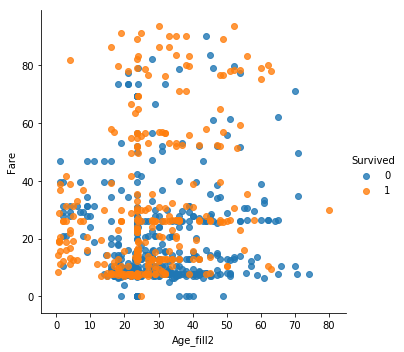

In [28]:
# (Age결측치가 평균으로 채워진 버전)
plt.figure(figsize=(10, 5))
sns.lmplot(data=low_modify_train, x="Age_fill2", y="Fare", hue="Survived", fit_reg=False)

In [29]:
train.loc[train["Age"] <= 15, "Age_group1"] = "Child"
train.loc[train["Age"] > 15, "Age_group1"] = "Not_Child"

train.loc[train["Age_fill"] <= 15, "Age_group2"] = "Child"
train.loc[train["Age_fill"] > 15, "Age_group2"] = "Not_Child"

train.loc[train["Age_fill2"] <= 15, "Age_group3"] = "Child"
train.loc[train["Age_fill2"] > 15, "Age_group3"] = "Not_Child"

print(train.shape)
train.head()

(891, 16)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_fill,Age_fill2,Age_group1,Age_group2,Age_group3
PassengerId,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0,Not_Child,Not_Child,Not_Child
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0,Not_Child,Not_Child,Not_Child
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0,Not_Child,Not_Child,Not_Child
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0,Not_Child,Not_Child,Not_Child
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0,Not_Child,Not_Child,Not_Child


In [30]:
pd.pivot_table(train, index="Age_group1", values="Survived")

,Survived
Age_group1,
Child,0.590361
Not_Child,0.381933


In [31]:
pd.pivot_table(train, index="Age_group2", values="Survived")

,Survived
Age_group2,
Child,0.388462
Not_Child,0.381933


In [32]:
pd.pivot_table(train, index="Age_group3", values="Survived")

,Survived
Age_group3,
Child,0.590361
Not_Child,0.362624


위 결과를 통해 알게된 사실을 정리하면 다음과 같습니다.

* 나이가 15세 이하인 어린이 및 청소년이며 운임요금을 20달러 이하로 지불한 승객일 수록 생존률이 상대적으로 높다.
* 즉, 보호자를 포함한 서민들 중에선 미성년자들의 생존률이 높다.
* Age의 결측치를 0이나 평균값으로 채워도 Child의 확률이 떨어지거나 Not_Child의 확률이 떨어졌다.(생존 예측 확률을 높이려면 굳이 결측치를 채우려고 하지 않아도 된다)

## 정리 및 추후 진행할 사항 

이후에는 나머지 분석을 하지 못한 데이터도 마저 분석을 진행해 보고, 본격적으로 분석을 토대로 데이터 전처리 후에 머신러닝 알고리즘을 사용하여 예측 결과를 내는 것 까지 진행해 보겠습니다(목표 정확도 80% 이상!)

### 출처

* Jupter notebook 블로그 paste 관련 전처리 :  https://versusall.tistory.com/entry/1-Tensor-Flow-%EC%8B%9C%EC%9E%91%ED%95%98%EA%B8%B0-Core-Tutorial?category=749169
* seaborn 데이터 시각화에 대한 정리 글 : https://brunch.co.kr/@jjason68/12
* seaborn 데이터 시각화에 대한 정리 글2 : https://pinkwink.kr/984
* DSSchool 기초과정에서 배운 내용을 토대로 재구성 및 복습